In [1]:
import pandas as pd
import geopandas as gpd
from osgeo import osr, gdal
import matplotlib.pyplot as plt
import numpy as np
import georasters as gr
import seaborn as sns
from scipy.interpolate import griddata

/opt/anaconda3/envs/SLResearch/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
vlm = pd.read_excel('data.xls')
file = 'Elevation.tif'
elevation = gr.from_file(file)
df = elevation.to_pandas()

## The cells below were added to check the elevation data

### Found inconstiencies in the elevation data, will remove values below -10m

In [3]:
# gdf = elevation.to_geopandas()

In [4]:
# df_new = df[df.value < -10]


In [5]:
# df_new.value.max()

In [6]:
# df.x[0] - df.x[1]

In [7]:
# df.y[0] - df.y[1000]

In [8]:
# a = np.sort(a)

In [9]:
# a[:150]


In [10]:
# np.sum(a < -10)

In [11]:
# a[0]

In [12]:
# cmap = sns.cubehelix_palette(as_cmap=True)
# plt.figure(figsize=(12, 8))

# points = plt.scatter(df.x, df.y, c= df.value)
# points = plt.scatter(df_new.x, df_new.y, c= 'red', marker='x')
# plt.colorbar(points)
# plt.title("Map with data points < -10 represented by x ")
# plt.show()

In [13]:
# cmap = sns.cubehelix_palette(as_cmap=True)
# plt.figure(figsize=(12, 8))

# points = plt.scatter(df_new.x, df_new.y, c= 'red', marker='x')
# plt.colorbar(points)
# plt.title("Map")
# plt.show()

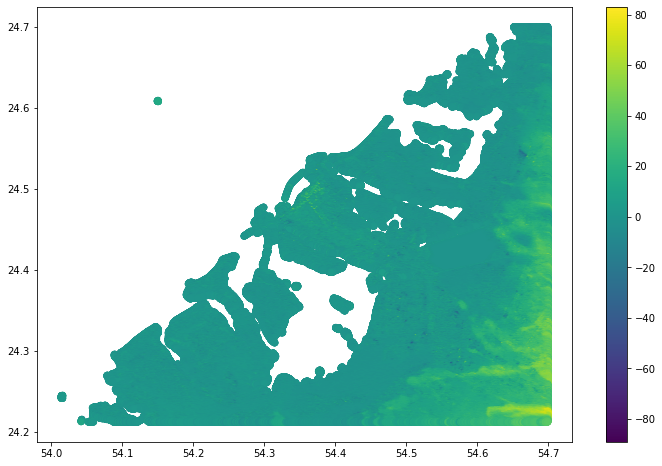

In [14]:
cmap = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(12, 8))
points = plt.scatter(df.x, df.y, c= df.value)
plt.colorbar(points)
plt.show()

In [15]:
vlm_new = vlm.drop(columns=['Station', 'VLM_std'], axis=1)
min_x, max_x = vlm_new.Longitude.min(), vlm_new.Longitude.max()
min_y, max_y = vlm_new.Latitude.min(), vlm_new.Latitude.max()

In [16]:
vlm_points = vlm_new[['Longitude', 'Latitude']].values
vlm_values = vlm_new.VLM.values
elev_coor = df[['x', 'y']].values

In [17]:
gridz0 = griddata(vlm_points, vlm_values, elev_coor, method='nearest')
gridz1 = griddata(vlm_points, vlm_values, elev_coor, method='linear')
gridz2 = griddata(vlm_points, vlm_values, elev_coor, method='cubic')

In [18]:
interpolation = df[['x', 'y', 'value']]
interpolation.rename(columns={'value': 'Elevation'}, inplace=True)
interpolation.head()

/opt/anaconda3/envs/SLResearch/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,x,y,Elevation
0,54.651806,24.700139,1.0
1,54.652084,24.700139,0.0
2,54.652361,24.700139,1.0
3,54.652639,24.700139,1.0
4,54.652917,24.700139,2.0


In [19]:
interpolation['Nearest'] = gridz0
interpolation['Linear'] = gridz1
interpolation['Cubic'] = gridz2
interpolation.head()

<ipython-input-19-d32fba4fcfd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolation['Nearest'] = gridz0


,x,y,Elevation,Nearest,Linear,Cubic
0,54.651806,24.700139,1.0,2.471,1.455849,1.984469
1,54.652084,24.700139,0.0,2.471,1.463968,1.989804
2,54.652361,24.700139,1.0,2.471,1.472088,1.995105
3,54.652639,24.700139,1.0,2.471,1.480207,2.000375
4,54.652917,24.700139,2.0,2.471,1.488327,2.005611


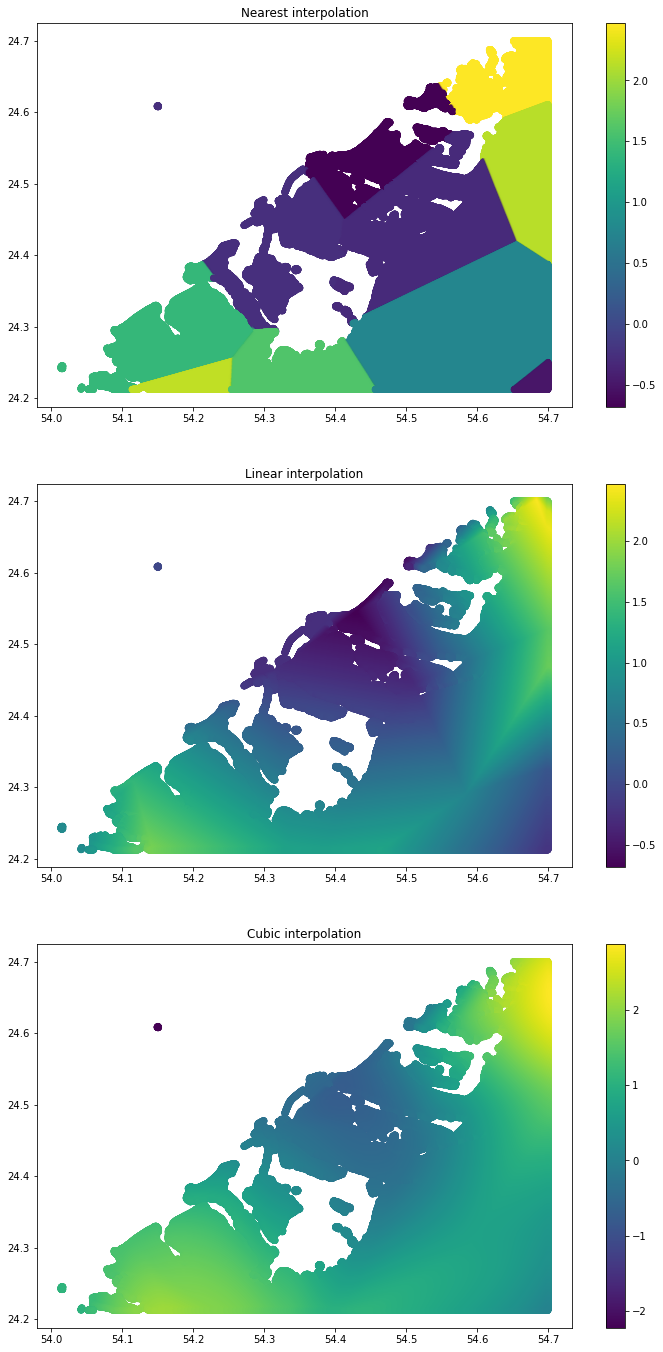

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 24))
# fig.suptitle('Vertically stacked subplots')
points1 = ax1.scatter(interpolation.x, interpolation.y, c=interpolation.Nearest)
ax1.set_title('Nearest interpolation')
fig.colorbar(points1, ax=ax1)
points2 = ax2.scatter(interpolation.x, interpolation.y, c=interpolation.Linear)
ax2.set_title('Linear interpolation')
fig.colorbar(points2, ax=ax2)
points3 = ax3.scatter(interpolation.x, interpolation.y, c=interpolation.Cubic)
ax3.set_title('Cubic interpolation')
fig.colorbar(points3, ax=ax3)
plt.show()

In [21]:
slr = pd.read_excel('data.xls', sheet_name=1, skiprows=15)[['Scenario', 'RSL in 2030 (cm)',
                                                            'RSL in 2050 (cm)', 'RSL in 2080 (cm)', 'RSL in 2100 (cm)']]

In [22]:
slr_new = slr.loc[(slr.Scenario == '0.3 - LOW') |  (slr.Scenario == '2.5 - HIGH')]
slr_new['SL'] = slr_new.sum(axis=1)
slr_new

<ipython-input-22-bb687f515d63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slr_new['SL'] = slr_new.sum(axis=1)


,Scenario,RSL in 2030 (cm),RSL in 2050 (cm),RSL in 2080 (cm),RSL in 2100 (cm),SL
1,0.3 - LOW,10,15,21,22,68
17,2.5 - HIGH,55,114,241,357,767


## Need to figure out the units first

In [23]:
elev_values = df[['value']].values.flatten()
interpolation['AE - Low'] = elev_values - slr_new.iloc[0]['RSL in 2030 (cm)'] + gridz0
interpolation['AE - High'] = elev_values - slr_new.iloc[1].SL + gridz0

In [24]:
slr_new.iloc[0]['RSL in 2030 (cm)']

10

In [25]:
ae_min = min(interpolation['AE - Low'].min(), interpolation['AE - High'].min())
ae_max = max(interpolation['AE - Low'].max(), interpolation['AE - High'].max())

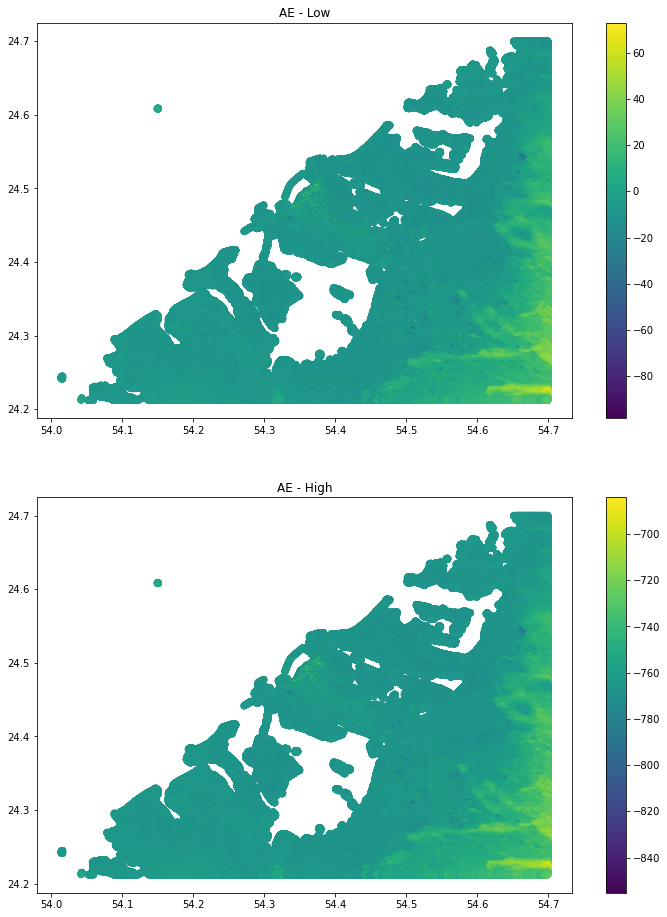

In [26]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 16))
# fig.suptitle('Vertically stacked subplots')
points1 = ax1.scatter(interpolation.x, interpolation.y, c=interpolation['AE - Low'])
ax1.set_title('AE - Low')
# norm_colors1 = ax1.pcolor(interpolation.x, interpolation.y, interpolation['AE - Low'], vmin=ae_min, vmax=ae_max)
fig.colorbar(points1, ax=ax1)
points2 = ax2.scatter(interpolation.x, interpolation.y, c=interpolation['AE - High'])
ax2.set_title('AE - High')
fig.colorbar(points2, ax=ax2)
plt.show()

In [27]:
import rasterio
import pyproj
from rasterio.plot import show

In [28]:
dataset = rasterio.open('Elevation.tif')
print(dataset.profile)
print(dataset.crs)
print(dataset.count)
print(dataset.width, dataset.height)
print(dataset.bounds)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 32767.0, 'width': 2521, 'height': 1758, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00027777780000000054, 0.0, 53.99986135,
       0.0, -0.0002777777999999998, 24.700138706), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}
EPSG:4326
1
2521 1758
BoundingBox(left=53.99986135, bottom=24.2118053336, right=54.700139183800005, top=24.700138706)


In [29]:
band = dataset.read(1)
print(band.shape)
band

(1758, 2521)


array([[32767, 32767, 32767, ...,    -2,    -4,    -4],
       [32767, 32767, 32767, ...,    -3,    -4,    -6],
       [32767, 32767, 32767, ...,    -3,    -4,    -4],
       ...,
       [32767, 32767, 32767, ...,    39,    38,    38],
       [32767, 32767, 32767, ...,    38,    39,    40],
       [32767, 32767, 32767, ...,    37,    38,    39]], dtype=int16)

In [30]:
left, top = dataset.transform * (0, 0) # upper left
right, bottom = dataset.transform * (dataset.width, dataset.height) # lower right
left, right, top, bottom

(53.99986135, 54.700139183800005, 24.700138706, 24.2118053336)

In [31]:
min_x, max_x, min_y, max_y

(52.587928, 54.95954, 23.721481, 24.796595)

In [32]:
x = np.linspace(min_x, max_x, dataset.width)
y = np.linspace(min_y, max_y, dataset.height)
X, Y = np.meshgrid(x,y)

In [33]:
xx = np.linspace(left, right, dataset.width)
yy = np.linspace(bottom, top, dataset.height)
XX, YY = np.meshgrid(x,y)

In [34]:
gridz00 = griddata(vlm_points, vlm_values, (X, Y), method='nearest')
gridz11 = griddata(vlm_points, vlm_values, (XX, YY), method='nearest')

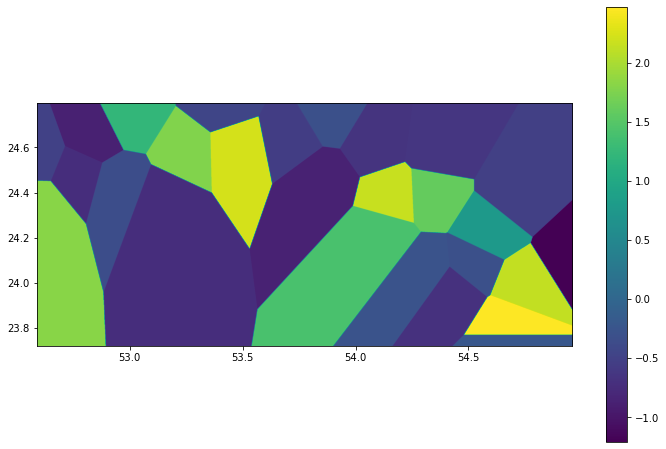

In [35]:
plt.figure(figsize=(12, 8))
plt.imshow(gridz00, extent=(min_x, max_x, min_y, max_y))
plt.colorbar()

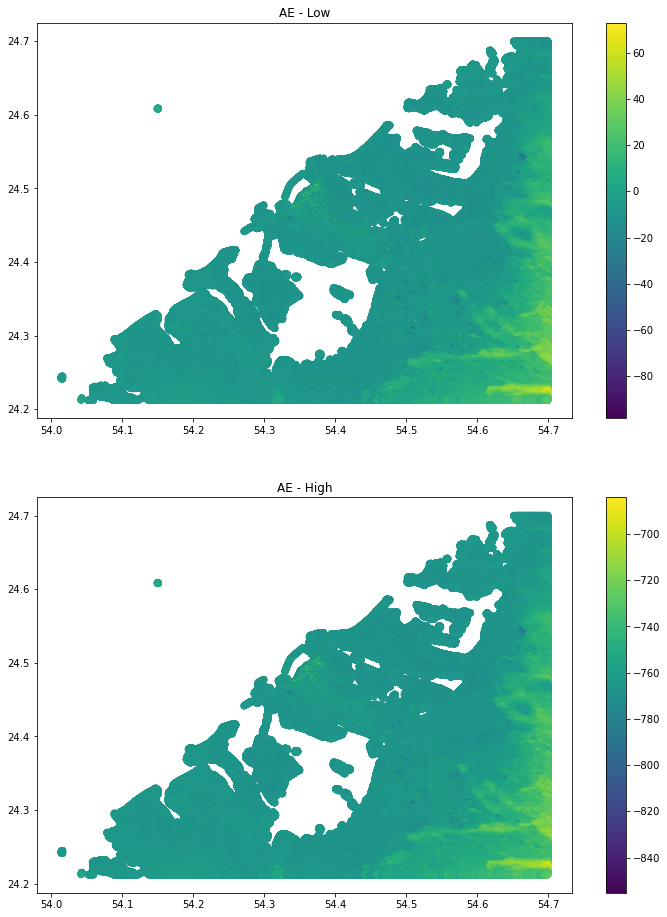

In [36]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 16))
points1 = ax1.scatter(interpolation.x, interpolation.y, c=interpolation['AE - Low'])
ax1.set_title('AE - Low')
# norm_colors1 = ax1.pcolor(X, Y, band, vmin=ae_min, vmax=ae_max)
fig.colorbar(points1, ax=ax1)
points2 = ax2.scatter(interpolation.x, interpolation.y, c=interpolation['AE - High'])
ax2.set_title('AE - High')
fig.colorbar(points2, ax=ax2)
plt.show()

In [37]:
elev_values

array([ 1.,  0.,  1., ..., 37., 38., 39.])

In [38]:
slr_new

,Scenario,RSL in 2030 (cm),RSL in 2050 (cm),RSL in 2080 (cm),RSL in 2100 (cm),SL
1,0.3 - LOW,10,15,21,22,68
17,2.5 - HIGH,55,114,241,357,767


In [39]:
gridz0

array([ 2.471,  2.471,  2.471, ..., -0.51 , -0.51 , -0.51 ])

In [40]:
np.shape(elev_values), np.shape(gridz0), np.shape(slr_new)

((1789661,), (1789661,), (2, 6))

In [41]:
interpolation

,x,y,Elevation,Nearest,Linear,Cubic,AE - Low,AE - High
0,54.651806,24.700139,1.0,2.471,1.455849,1.984469,-6.529,-763.529
1,54.652084,24.700139,0.0,2.471,1.463968,1.989804,-7.529,-764.529
2,54.652361,24.700139,1.0,2.471,1.472088,1.995105,-6.529,-763.529
3,54.652639,24.700139,1.0,2.471,1.480207,2.000375,-6.529,-763.529
4,54.652917,24.700139,2.0,2.471,1.488327,2.005611,-5.529,-762.529
...,...,...,...,...,...,...,...,...
1789656,54.698750,24.212083,37.0,-0.510,-0.188579,0.064897,26.490,-730.510
1789657,54.699028,24.212083,36.0,-0.510,-0.190314,0.062818,25.490,-731.510
1789658,54.699306,24.212083,37.0,-0.510,-0.192049,0.060737,26.490,-730.510
1789659,54.699584,24.212083,38.0,-0.510,-0.193784,0.058652,27.490,-729.510


In [42]:
interpolation['AE - Low']

0          -6.529
1          -7.529
2          -6.529
3          -6.529
4          -5.529
            ...  
1789656    26.490
1789657    25.490
1789658    26.490
1789659    27.490
1789660    28.490
Name: AE - Low, Length: 1789661, dtype: float64